In [26]:
import tensorflow

In [27]:
from tensorflow import keras

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D


In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Activation, Concatenate


In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation
from tensorflow.keras.models import Model

# Import your encoder and decoder blocks
#from my_unet_module import encoder_block, decoder_block  # Replace 'my_unet_module' with the actual module name

In [31]:
def encoder_block(inputs, num_filters):

	# Convolution with 3x3 filter followed by ReLU activation
	x = tf.keras.layers.Conv2D(num_filters,
							3,
							padding = 'valid')(inputs)
	x = tf.keras.layers.Activation('relu')(x)

	# Convolution with 3x3 filter followed by ReLU activation
	x = tf.keras.layers.Conv2D(num_filters,
							3,
							padding = 'valid')(x)
	x = tf.keras.layers.Activation('relu')(x)

	# Max Pooling with 2x2 filter
	x = tf.keras.layers.MaxPool2D(pool_size = (2, 2),
								strides = 2)(x)

	return x


In [32]:
def decoder_block(inputs, skip_features, num_filters):

	# Upsampling with 2x2 filter
	x = tf.keras.layers.Conv2DTranspose(num_filters,
										(2, 2),
										strides = 2,
										padding = 'valid')(inputs)

	# Copy and crop the skip features
	# to match the shape of the upsampled input
	skip_features = tf.keras.layers.Resizing(x.shape[1], # Provide width
									x.shape[2])(skip_features) # Provide height and call the layer
	x = tf.keras.layers.Concatenate()([x, skip_features])

	# Convolution with 3x3 filter followed by ReLU activation
	x = tf.keras.layers.Conv2D(num_filters,
							3,
							padding = 'valid')(x)
	x = tf.keras.layers.Activation('relu')(x)

	# Convolution with 3x3 filter followed by ReLU activation
	x = tf.keras.layers.Conv2D(num_filters, 3, padding = 'valid')(x)
	x = tf.keras.layers.Activation('relu')(x)

	return x

In [33]:
def unet_model(input_shape=(256, 256, 3), num_classes=1):
    inputs = tf.keras.layers.Input(input_shape)

    # Contracting Path
    s1 = encoder_block(inputs, 64)
    s2 = encoder_block(s1, 128)
    s3 = encoder_block(s2, 256)
    s4 = encoder_block(s3, 512)

    # Bottleneck
    b1 = Conv2D(1024, 3, padding='valid')(s4)
    b1 = Activation('relu')(b1)
    b1 = Conv2D(1024, 3, padding='valid')(b1)
    b1 = Activation('relu')(b1)

    # Expansive Path
    s5 = decoder_block(b1, s4, 512)
    s6 = decoder_block(s5, s3, 256)
    s7 = decoder_block(s6, s2, 128)
    s8 = decoder_block(s7, s1, 64)

    # Output
    outputs = Conv2D(num_classes, 1, padding='valid', activation='sigmoid')(s8)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='U-Net')
    return model

if __name__ == '__main__':
    model = unet_model(input_shape=(572, 572, 3), num_classes=2)
    model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 572, 572, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_126 (Conv2D)       │ (None, 570, 570, 64)   │          1,792 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_122            │ (None, 570, 570, 64)   │              0 │ conv2d_126[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_127 (Conv2D)       │ (None, 568, 568, 64)   │         36,928 │ activation_122[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_123            │ (None, 568, 568, 64)   │              0 │ conv2d_127[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_36          │ (None, 284, 284, 64)   │              0 │ activation_123[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_128 (Conv2D)       │ (None, 282, 282, 128)  │         73,856 │ max_pooling2d_36[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_124            │ (None, 282, 282, 128)  │              0 │ conv2d_128[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_129 (Conv2D)       │ (None, 280, 280, 128)  │        147,584 │ activation_124[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_125            │ (None, 280, 280, 128)  │              0 │ conv2d_129[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_37          │ (None, 140, 140, 128)  │              0 │ activation_125[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_130 (Conv2D)       │ (None, 138, 138, 256)  │        295,168 │ max_pooling2d_37[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_126            │ (None, 138, 138, 256)  │              0 │ conv2d_130[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_131 (Conv2D)       │ (None, 136, 136, 256)  │        590,080 │ activation_126[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_127            │ (None, 136, 136, 256)  │              0 │ conv2d_131[0][0]       │
│ (Activation)              │                        │                │                        │
├──────────────────────

 Total params: 31,031,810 (118.38 MB)

 Trainable params: 31,031,810 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


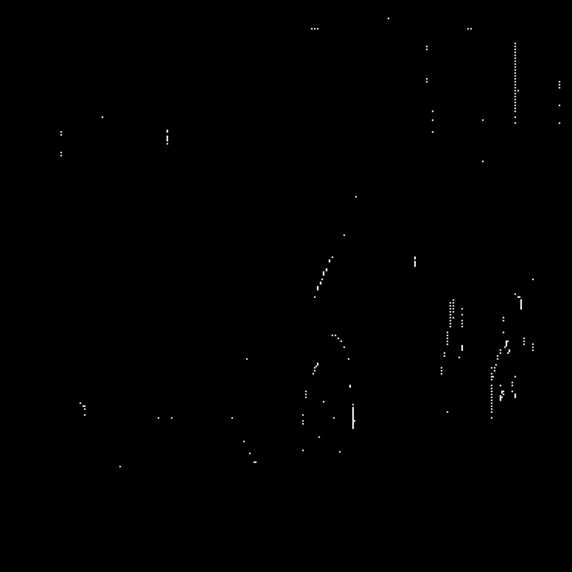

In [34]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

# Load the image
img = Image.open('/content/685680.jpg')
# Preprocess the image
img = img.resize((572, 572))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array[:,:,:3], axis=0)
img_array = img_array / 255.

# Load the model
model = unet_model(input_shape=(572, 572, 3), num_classes=2)

# Make predictions
predictions = model.predict(img_array)

# Convert predictions to a numpy array and resize to original image size
predictions = np.squeeze(predictions, axis=0)
predictions = np.argmax(predictions, axis=-1)
predictions = Image.fromarray(np.uint8(predictions*255))
predictions = predictions.resize((img.width, img.height))

# Save the predicted image
predictions.save('predicted_image.jpg')
predictions
